In [1]:
import numpy as np
rng = np.random.default_rng(42)
from seaborn import heatmap

TODO: implement this: https://stackoverflow.com/questions/55818845/fast-vectorized-multinomial-in-python

In [2]:
interaction = np.array([[1,0.1,-0.1],[0.1,1,0.1],[-0.1,-0.1,1]])

In [3]:
interaction

array([[ 1. ,  0.1, -0.1],
       [ 0.1,  1. ,  0.1],
       [-0.1, -0.1,  1. ]])

In [4]:
D = 100000
S = 3

In [5]:
exponentials = rng.exponential(scale=1, size=(S,D))
dirichlet = exponentials / np.sum(exponentials, axis=0)

note different approach

In [6]:
interaction_exponentials = np.exp(interaction.T @ exponentials) # ensure non-negative
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

assume we have N=2 cells in each droplet because whatever that is simpler for now

In [7]:
dirichlet_multinomial = np.zeros((S, D))
for d in range(D):
    dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=dirichlet[:,d])

In [8]:
interaction_dirichlet_multinomial = np.zeros((S, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])

In [9]:
dm_nonzero = dirichlet_multinomial > 0
idm_nonzero = interaction_dirichlet_multinomial > 0

In [10]:
dm_cooccurrence = np.zeros((S,S))

dm_cooccurrence[0,0] = np.sum(dm_nonzero[0,:] & ~dm_nonzero[1,:] & ~dm_nonzero[2,:])
dm_cooccurrence[1,1] = np.sum(~dm_nonzero[0,:] & dm_nonzero[1,:] & ~dm_nonzero[2,:])
dm_cooccurrence[2,2] = np.sum(~dm_nonzero[0,:] & ~dm_nonzero[1,:] & dm_nonzero[2,:])

dm_cooccurrence[0,1] = np.sum(dm_nonzero[0,:] & dm_nonzero[1,:] & ~dm_nonzero[2,:])
dm_cooccurrence[0,2] = np.sum(dm_nonzero[0,:] & ~dm_nonzero[1,:] & dm_nonzero[2,:])

dm_cooccurrence[1,2] = np.sum(~dm_nonzero[0,:] & dm_nonzero[1,:] & dm_nonzero[2,:])

In [11]:
dm_cooccurrence /= D
dm_cooccurrence

array([[0.16639, 0.16441, 0.16812],
       [0.     , 0.16658, 0.16723],
       [0.     , 0.     , 0.16727]])

In [12]:
mask = ~np.triu(np.ones_like(dm_cooccurrence, dtype=bool))

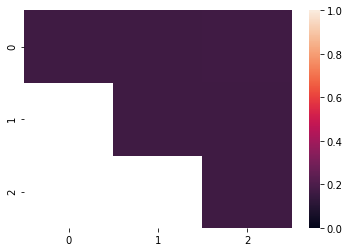

In [13]:
heatmap(dm_cooccurrence, mask=mask, vmin=0., vmax=1.)

In [14]:
idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

In [15]:
idm_cooccurrence /= D
idm_cooccurrence

array([[0.16214, 0.18003, 0.16776],
       [0.     , 0.1504 , 0.16899],
       [0.     , 0.     , 0.17068]])

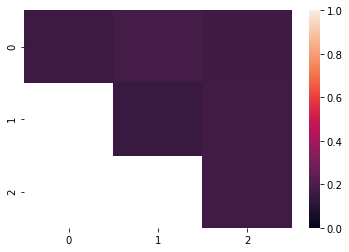

In [16]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Stronger Interactions

In [17]:
interaction = np.array([[1,0.25,-0.25],[0.25,1,0.25],[-0.25,-0.25,1]])
interaction

array([[ 1.  ,  0.25, -0.25],
       [ 0.25,  1.  ,  0.25],
       [-0.25, -0.25,  1.  ]])

In [18]:
interaction_exponentials = np.exp(interaction.T @ exponentials) # ensure non-negative
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((S, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D

In [19]:
idm_cooccurrence

array([[0.15888, 0.18982, 0.15935],
       [0.     , 0.1364 , 0.16895],
       [0.     , 0.     , 0.1866 ]])

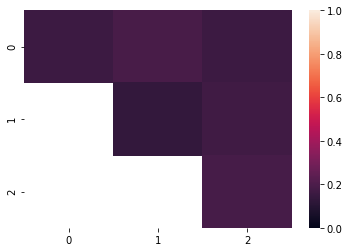

In [20]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Crank up the interactions further

In [21]:
interaction = np.array([[1,0.5,-0.5],[0.5,1,0.5],[-0.5,-0.5,1]])
interaction

array([[ 1. ,  0.5, -0.5],
       [ 0.5,  1. ,  0.5],
       [-0.5, -0.5,  1. ]])

In [22]:
interaction_exponentials = np.exp(interaction.T @ exponentials) # ensure non-negative
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((S, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D

In [23]:
idm_cooccurrence

array([[0.14725, 0.20808, 0.14808],
       [0.     , 0.11959, 0.16404],
       [0.     , 0.     , 0.21296]])

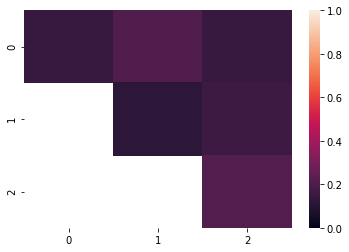

In [24]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Now at ridiculously high level

In [25]:
interaction = np.array([[1,1,-1],[1,1,1],[-1,-1,1]])
interaction

array([[ 1,  1, -1],
       [ 1,  1,  1],
       [-1, -1,  1]])

In [26]:
interaction_exponentials = np.exp(interaction.T @ exponentials) # ensure non-negative
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((S, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D

In [27]:
idm_cooccurrence

array([[0.11383, 0.23136, 0.13753],
       [0.     , 0.11553, 0.13866],
       [0.     , 0.     , 0.26309]])

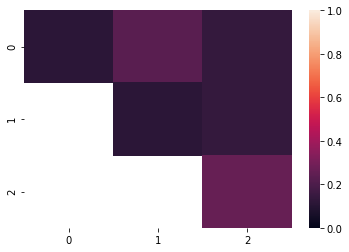

In [28]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)